# STAGE 1 : Projet Machine Learning
#### Marine JOURNU / Lison LEANDRE / Clemence FLEURIOT / Naomie HALFON 

Our goal ? Find if a patient has a heart disease using a predictive algorithms. 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score,roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("heart.csv")

## Data description and analysis

In [3]:
print("Data Head:\n", data.head())
print("Data Description:\n", data.describe())
print("Data Info:\n", data.info())
print("\nClass Distribution:")
print(data['target'].value_counts())

Data Head:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Data Description:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000

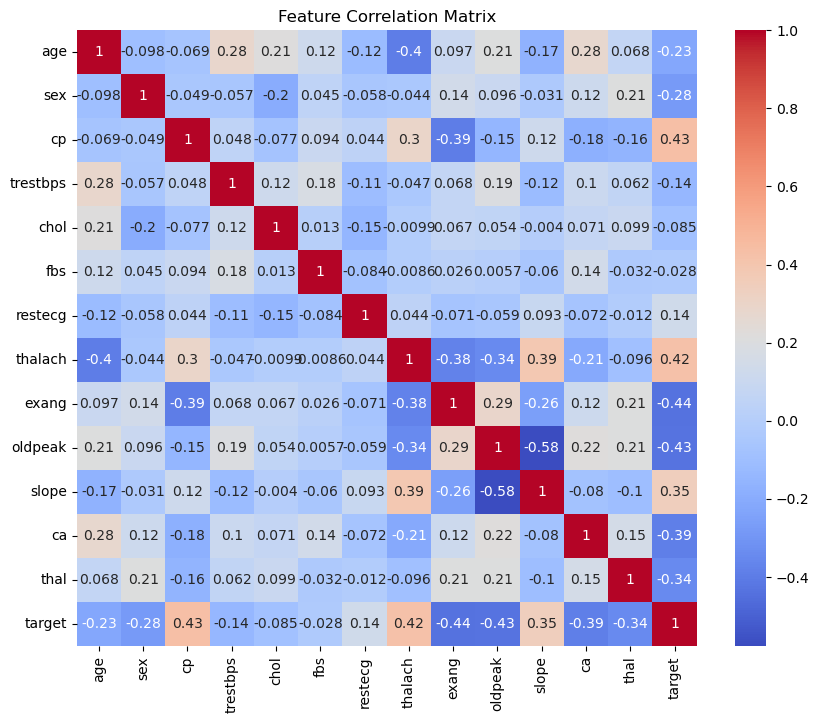

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [5]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


No missing values !

In [27]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# Data Preprocessing

In [14]:
X = data.drop('target', axis=1)  # Assuming 'target' is the label column
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

### 1. Logistic Regression

In [16]:
log_regression = LogisticRegression()
log_regression_params = {'C': [0.01, 0.1, 1, 10, 100]}
logR = GridSearchCV(log_regression, log_regression_params, cv=5, scoring='accuracy')
logR.fit(X_train, y_train)
logR_pred=logR.predict(X_test)

Grid Search: GridSearchCV tests different values of C using 5-fold cross-validation and selects the best one based on accuracy.

### 2. Decision tree

In [17]:
tree = DecisionTreeClassifier()
tree_params = {'max_depth': [None, 10, 20, 30], 'min_samples_leaf': [1, 2, 5, 10]}
tree = GridSearchCV(tree, tree_params, cv=5, scoring='accuracy')
tree.fit(X_train, y_train)
tree_pred=tree.predict(X_test)

Grid Search: Tests different combinations of max_depth and min_samples_leaf using cross-validation.

### 3. SVM

In [18]:
svm = SVC(probability=True)
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']}
svm = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

Grid Search: Tests different combinations of C and kernel using cross-validation.

## Cross Validation and metrics evaluation


Model: Logistic Regression
Accuracy: 0.8361
F1 Score: 0.8750
AUC-ROC: 0.9103


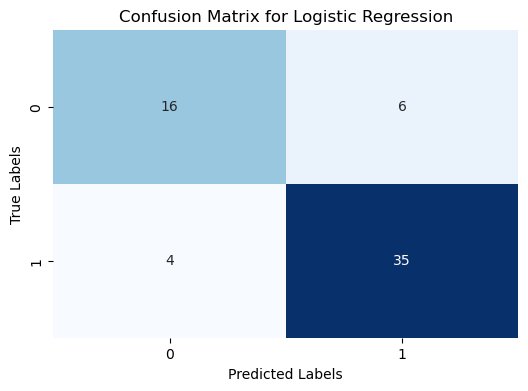


Model: Decision Tree
Accuracy: 0.8197
F1 Score: 0.8608
AUC-ROC: 0.8566


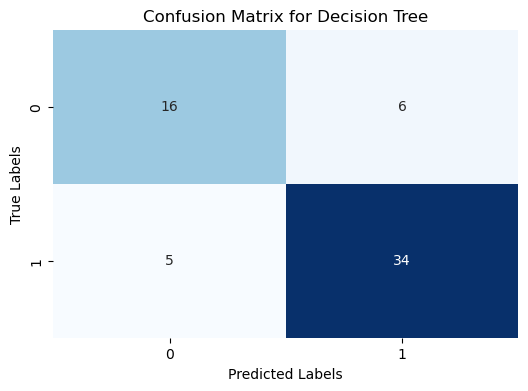


Model: SVM
Accuracy: 0.8361
F1 Score: 0.8718
AUC-ROC: 0.8904


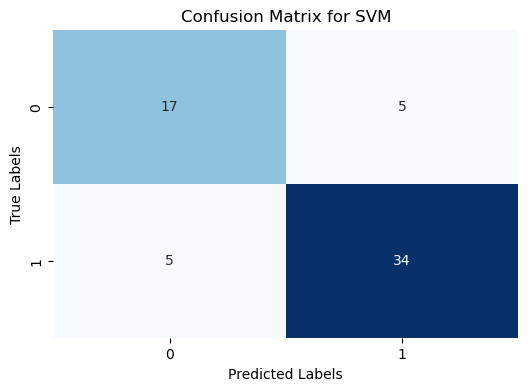

In [20]:
models = {
    'Logistic Regression': logR.best_estimator_,
    'Decision Tree': tree.best_estimator_,
    'SVM': svm.best_estimator_
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

### how to read a confusion matrix : 
            |TN|FP|
            |FN|TP|
- Top-Left (TN): The model predicted 0 (no heart disease), and the actual value was 0. True Negative.
- Top-Right (FP): The model predicted 1 (presence of heart disease), but the actual value was 0. False Positive.
- Bottom-Left (FN): The model predicted 0, but the actual value was 1. False negative.
- Bottom-Right (TP): The model predicted 1, and the actual value was 1. True Positive

Best Models: best_estimator_ retrieves the model with the best hyperparameters found during GridSearchCV.

#### Metrics:
- Accuracy: The proportion of correct predictions over the total number of cases.
- F1 Score: The harmonic mean of precision and recall, useful for imbalanced datasets.
- AUC-ROC: The area under the Receiver Operating Characteristic curve, indicating the model's performance in distinguishing between classes.
- Confusion Matrix: A matrix showing true vs. predicted classifications.

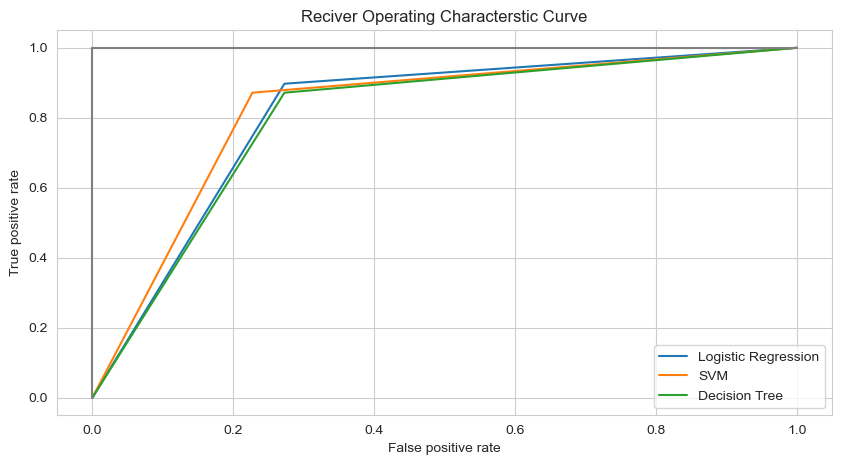

In [26]:
logR_false_positive_rate,logR_true_positive_rate,logR_threshold = roc_curve(y_test,logR_pred)                                                             
svm_false_positive_rate,svm_true_positive_rate,svm_threshold = roc_curve(y_test,svm_pred)
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,tree_pred)

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(logR_false_positive_rate,logR_true_positive_rate,label='Logistic Regression')
plt.plot(svm_false_positive_rate,svm_true_positive_rate,label='SVM')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [22]:
def average_result(nb_run):
    # Dictionary of models to evaluate
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "SVM": SVC()
    }

    for model_name, model in models.items():
        total_accuracy = 0

        for i_run in range(nb_run):
            # Split the data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i_run)
            
            # Standardize the data
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Train the model
            model.fit(X_train, y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate accuracy
            accuracy = accuracy_score(y_test, y_pred)
            total_accuracy += accuracy

        # Calculate average accuracy
        average_accuracy = total_accuracy / nb_run
        print(f"{model_name}: Average Accuracy after {nb_run} runs: {average_accuracy*100:.2f}%\n")

average_result(100)

Logistic Regression: Average Accuracy after 100 runs: 82.18%

Decision Tree: Average Accuracy after 100 runs: 74.89%

SVM: Average Accuracy after 100 runs: 81.66%



We can see that Logistic Regression has the best score !
We are now going to show the most important features to find a heart disease :

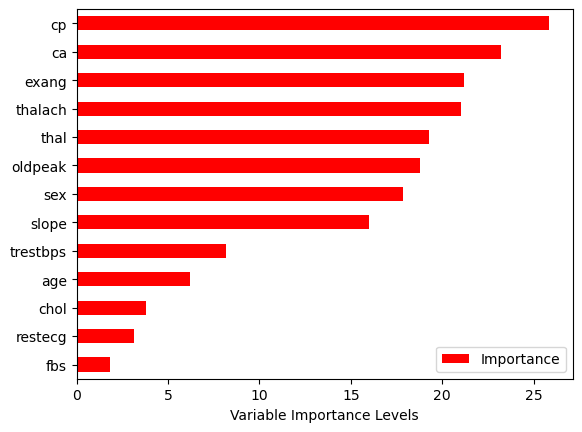

In [23]:
best_log_regression = logR.best_estimator_

# Calcul de l'importance des variables
Importance = pd.DataFrame({"Importance": abs(best_log_regression.coef_[0]) * 100},
                          index=data.drop('target', axis=1).columns)
Importance.sort_values(by="Importance", 
                       axis=0, 
                       ascending=True).plot(kind="barh", color="r")

# Affichage du graphique
plt.xlabel("Variable Importance Levels")
plt.show()

We can see that Chest Pain et the number of major vessels colored by flourosopy are the major symptom 

For the stage 2 we will consider advanced techniques like ensemble methods (e.g., Random Forest, XGBoost) or feature engineering.

# END